In [1]:
import os 
from PIL import Image, ImageFilter, ImageEnhance

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
current_path = os.getcwd()
train_image_path = os.path.join(current_path, "train_image")
test_image_path = os.path.join(current_path, "test_image")

In [3]:
train_image = []
test_image = []

train_label = []
test_label =[]

In [4]:
if len(train_image) == 0:
    for image in os.listdir(train_image_path):
        join = os.path.join(train_image_path, image)
        train_label.append(image[0])
        with open(join) as file:
            img = []
            for f in file:
                img.append(f.split()[3:])

            img = np.array(img, dtype='float32')
            train_image.append(img)

In [5]:
if len(test_image) == 0:
    for image in os.listdir(test_image_path):
        join = os.path.join(test_image_path, image)
        test_label.append(image[0])
        with open(join) as file:
            img = []
            for f in file:
                img.append(f.split()[3:])

            img = np.array(img, dtype='float32')
            test_image.append(img)

In [6]:
train_images = pd.DataFrame({"Image":train_image,
                             "Label":train_label})

test_images = pd.DataFrame({"Image":test_image,
                            "Label":test_label})

In [7]:
train_images.head()

,Image,Label
0,"[[0.0, 0.0, 0.0, 20.0, 20.0, 46.1], [19.0, 0.0...",a
1,"[[0.0, 0.0, 0.0, 12.0, 12.0, 37.66], [7.0, 0.0...",a
2,"[[0.0, 0.0, 0.0, 20.0, 20.0, 43.05], [19.0, 0....",a
3,"[[0.0, 0.0, 0.0, 7.0, 7.0, 25.0], [6.0, 0.0, 6...",a
4,"[[0.0, 0.0, 0.0, 7.0, 7.0, 40.0], [21.0, 0.0, ...",a


In [8]:
test_images.head()

,Image,Label
0,"[[0.0, 0.0, 0.0, 13.0, 13.0, 45.28], [20.0, 0....",a
1,"[[0.0, 0.0, 0.0, 20.0, 20.0, 37.11], [9.0, 0.0...",a
2,"[[0.0, 0.0, 0.0, 16.0, 16.0, 26.93], [6.0, 0.0...",a
3,"[[0.0, 0.0, 0.0, 15.0, 15.0, 45.88], [13.0, 0....",a
4,"[[0.0, 0.0, 0.0, 8.0, 8.0, 29.21], [23.0, 0.0,...",a


In [9]:
def plot_imshow_samples(data, Label=None, index=None):
    if len(index) != None:
        if len(index) != 4: 
            return print("index have to equal to 4")

        fig, ax = plt.subplots(figsize=(15, 9), nrows=2, ncols=2)

        for i in range(2):
            image = Image.fromarray(data.iloc[index[i]]["Image"]).convert('L')
            label = data.iloc[index[i]]["Label"]
            ax[i, 0].imshow(image)
            ax[i, 0].set_title(f"Plot image '{label}' Label")

        for i in range(2):
            image = Image.fromarray(data.iloc[index[2+i]]["Image"]).convert('L')
            label = data.iloc[index[2+i]]["Label"]
            ax[i, 1].imshow(image)
            ax[i, 1].set_title(f"Plot image '{label}' Label")

        return plt.show()
    
    if label != None:
        fig, ax = plt.subplots(figsize=(15, 9), nrows=2, ncols=2)
        
        index_image = data[data["Label"] == Label].index
        
        for i in range(2):
            image = Image.fromarray(data.iloc[index_image[i]]["Image"]).convert("L")
            label = data.iloc[index_image[i]]["Label"]
            ax[i, 0].imshow(image)
            ax[i, 0].set_title(f"Plot image '{label}' Label")
            
        for i in range(2):
            image = Image.fromarray(data.iloc[index_image[2+i]]["Image"]).convert("L")
            label = data.iloc[index_image[2+i]]["Label"]
            ax[i, 1].imshow(image)
            ax[i, 1].set_title(f"Plot image '{label}' Label")
            
        return plt.show()

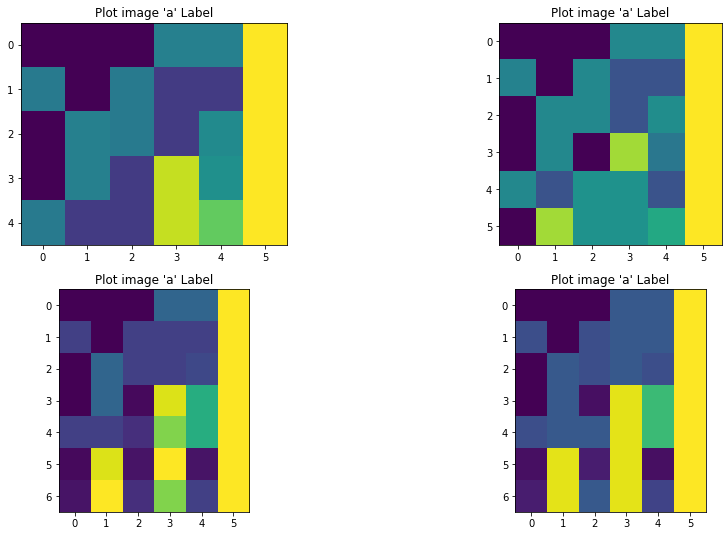

In [10]:
plot_imshow_samples(data=train_images, index=train_images.head(4).index)

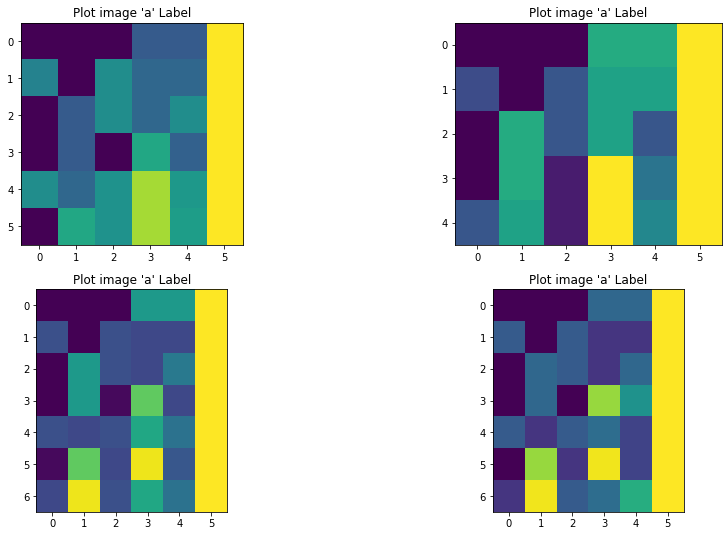

In [11]:
plot_imshow_samples(index=test_images.head(4).index, data=test_images)

In [12]:
def enhance_images(data, enhanced=None, size=None, mode="L"):
    if enhanced == None:
        return print("choose what to enhance")
    elif enhanced == "sharpness":
        images = []
        for image in data["Image"]:
            img = Image.fromarray(image).convert(mode)
            img = ImageEnhance.Sharpness(img).enhance(size)
            images.append(np.array(img, dtype='float32'))
            
        data["Image"] = images
        return "Done"
    elif enhanced == "brightness":
        images = []
        for image in data["Image"]:
            img = Image.fromarray(image).convert(mode)
            img = ImageEnhance.Brightness(img).enhance(size)
            images.append(np.array(img, dtype='float32'))
            
        data["Image"] = images
        return "Done"
    elif enhanced == "contrast":
        images = []
        for image in data["Image"]:
            img = Image.fromarray(image).convert(mode)
            img = ImageEnhance.Contrast(img).enhance(size)
            images.append(np.array(img, dtype='float32'))
            
        data["Image"] = images
        return "Done"
    elif enhanced == "color":
        images = []
        for image in data["Image"]:
            img = Image.fromarray(image).convert(mode)
            img = ImageEnhance.Color(img).enhance(size)
            images.append(np.array(img, dtype='float32'))
        
        data["Image"] = images
        return "Done"

In [13]:
def resize_images(data, size=None, mode="L"):
    if size == None:
        return print("choose what size")
    elif type(size) != tuple:
        return print("type must be tuple")
    elif len(size) != 2:
        return print("size must be 2D")
    
    images = []
    for image in data["Image"]:
        img = Image.fromarray(image).convert(mode)
        img = img.resize(size, Image.BILINEAR)
        images.append(np.array(img, dtype='float32'))
        
    data["Image"] = images
    
    return "Done"

In [14]:
def plot_distim(data, label=None):
    if label != None:
        if type(label) == str:
            fig, ax = plt.subplots(figsize=(15, 9), nrows=2, ncols=2)
            
            image = list(data[data["Label"] == label]["Image"])
            for i in range(2):
                pixels = []
                for row in image[i]:
                    for column in row:
                        pixels.append(column)
                            
                sns.distplot(x=pixels, ax=ax[i][0])
                ax[i][0].set_title(f"Histogram image of '{label}' Label")
                
            for i in range(2):
                pixels = []
                for row in image[2+i]:
                    for column in row:
                        pixels.append(column)
                        
                sns.distplot(x=pixels, ax=ax[i][1])
                ax[i][1].set_title(f"Histogram image of '{label}' Label")
                
            return plt.show()
        elif type(label) == list:
            fig, ax = plt.subplots(figsize=(15, 9), nrows=2, ncols=2)
            
            for i in range(len(label)):
                image = data[data["Label"] == label[i]]["Image"]
                pixels = []
                for img in image:
                    for row in img:
                        for column in row:
                            pixels.append(column)

                if i < 2:
                    sns.distplot(x=pixels, ax=ax[i][0])
                    ax[i][0].set_title(f"Plot distribution of '{label[i]}' Label")
                elif i >= 2:
                    _i = i - 2
                    sns.distplot(x=pixels, ax=ax[_i][1])
                    ax[_i][1].set_title(f"Plot distribution of '{label[i]}' Label")
                    
            return plt.show()
                
    else:
        fig, ax = plt.subplots(figsize=(15, 9))
        
        pixels = []
        images = data["Image"]
        for image in images:
            for row in image:
                for column in row:
                    pixels.append(column)
                    
        sns.distplot(x=pixels)
        plt.title("Plot distribution")
        plt.show()

C:\Users\Bina Umat\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Bina Umat\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Bina Umat\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

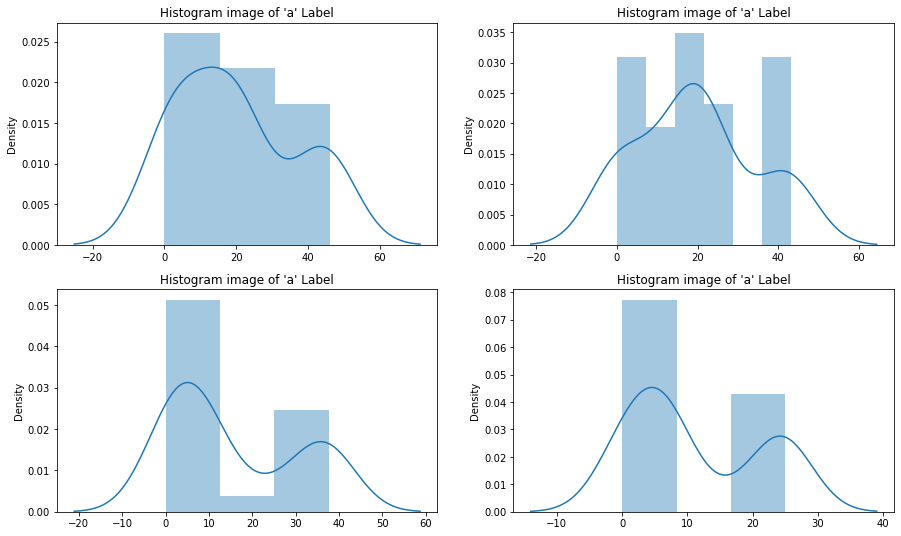

In [15]:
plot_distim(train_images, label='a')

C:\Users\Bina Umat\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Bina Umat\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Bina Umat\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

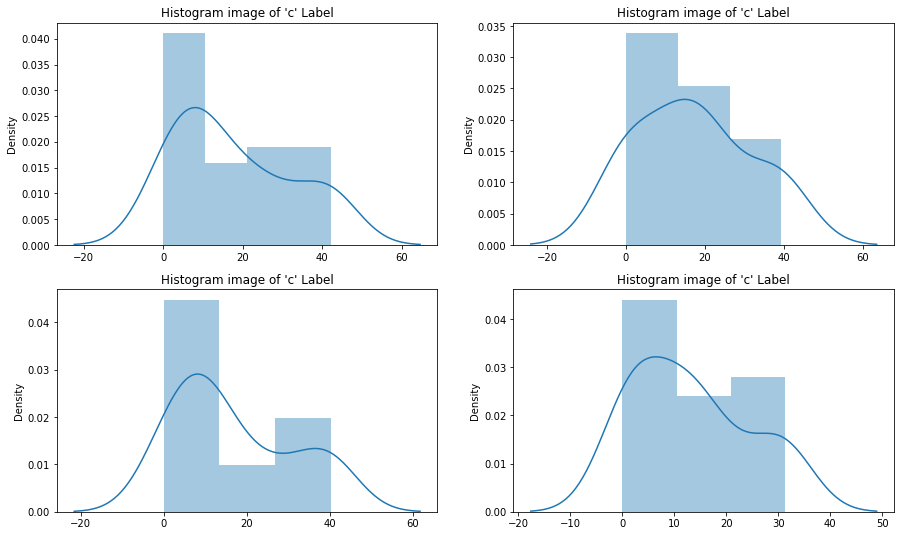

In [16]:
plot_distim(train_images, label='c')

C:\Users\Bina Umat\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Bina Umat\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Bina Umat\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

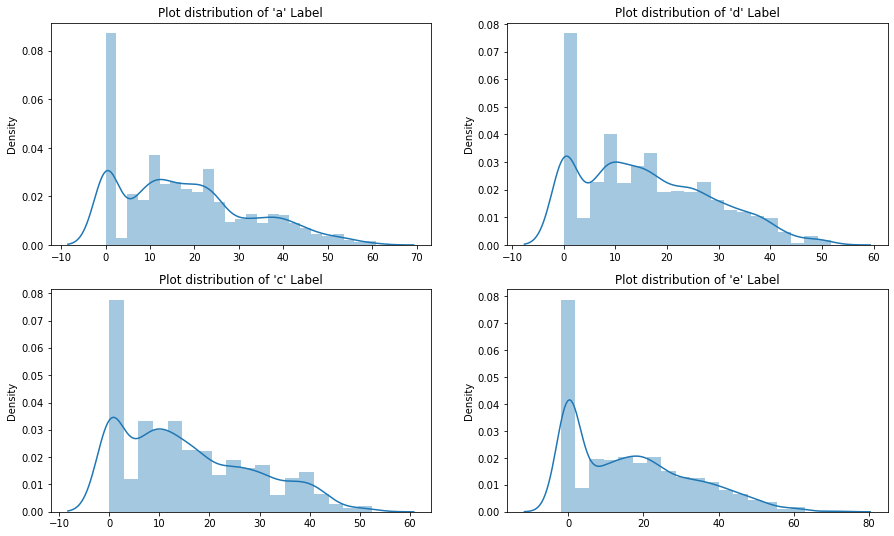

In [17]:
plot_distim(train_images, label=['a', 'c', 'd', 'e'])

C:\Users\Bina Umat\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Bina Umat\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Bina Umat\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

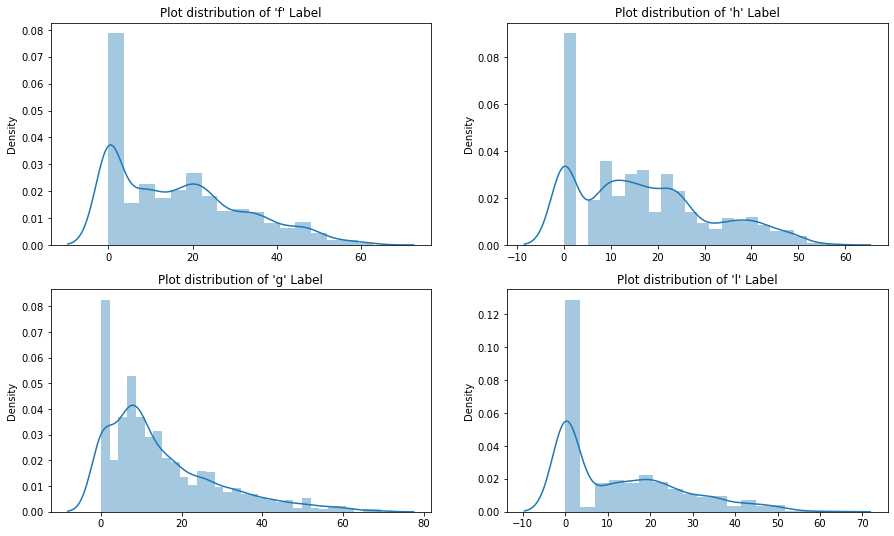

In [18]:
plot_distim(train_images, label=['f', 'g', 'h', 'l'])

C:\Users\Bina Umat\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


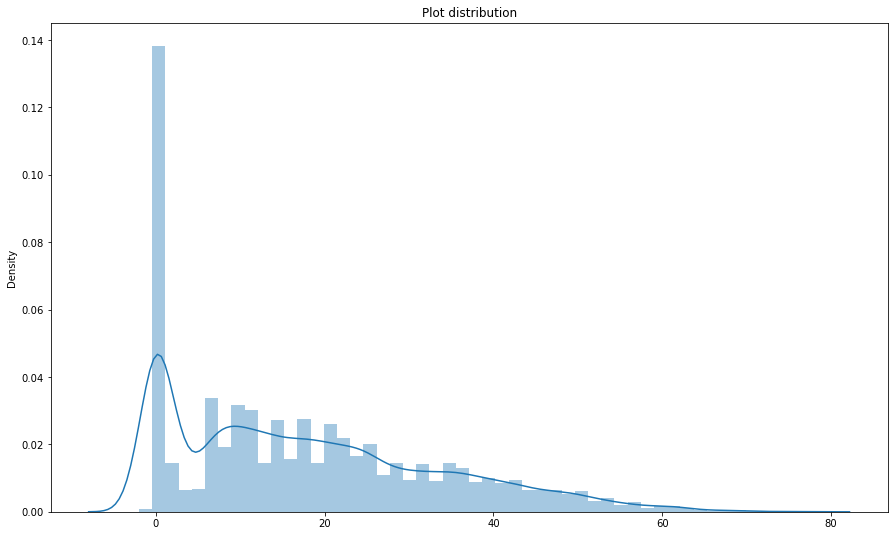

In [19]:
plot_distim(train_images)

In [20]:
def mean_median_image(data):
    labels = data["Label"].unique()
    labels = np.append(labels, "Total")
    mean_median = pd.DataFrame(data=np.zeros((2, len(labels))), 
                               columns=labels, 
                               index=["mean", "median"])
    
    for label in labels:
        if label != "Total":
            pixels = np.array([])
            images = data[data["Label"] == label]["Image"]
            for img in images:
                for row in img:
                    for column in row:
                        pixels = np.append(pixels, column)
                        
            mean_median.loc["mean", label] = np.mean(pixels)
            mean_median.loc["median", label] = np.median(pixels)
        
        else:
            pixels = np.array([])
            images = data["Image"]
            for img in images:
                for row in img:
                    for column in row:
                        pixels = np.append(pixels, column)
            
            mean_median.loc["mean", label] = np.mean(pixels)
            mean_median.loc["median", label] = np.median(pixels)

    return mean_median

In [21]:
mean_med = mean_median_image(train_images)
mean_med_test = mean_median_image(test_images)

mean_med

,a,c,d,e,f,g,h,l,p,r,Total
mean,18.068618,15.65323,16.266948,16.68493,16.786638,15.047312,16.911003,12.968111,23.425805,22.383359,17.91996
median,16.030001,13.00000,14.815000,14.00000,15.000000,11.000000,15.000000,9.000000,21.000000,20.000000,15.00000


In [22]:
def separate_threshold(images, threshold):
    for image in images:
        for row in  range(len(image)):
            for column in range(len(image[row])):
                if image[row][column] < threshold:
                    image[row][column] = 0
                else:
                    image[row][column] = 1

    return images

In [23]:
def max_row_column(data):
    max_row = []
    max_column = []

    for image in data["Image"]:
        img = Image.fromarray(image)
        row = img.size[1]
        column = img.size[0]
        max_row.append(row)
        max_column.append(column)

    max_row = np.max(max_row)
    max_column = np.max(max_column)

    return (max_column, max_row)

In [24]:
max_row_column_train = max_row_column(train_images)
max_row_column_test = max_row_column(test_images)

resize_images(train_images, size=max_row_column_train)
resize_images(test_images, size=max_row_column_test)

'Done'

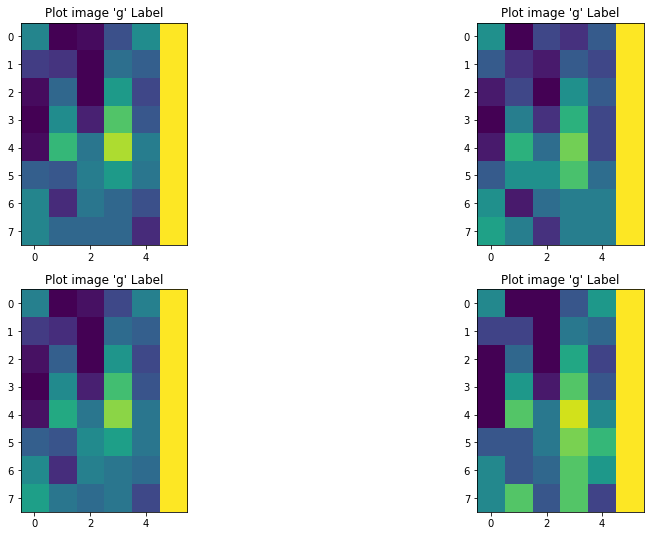

In [25]:
samples = train_images[train_images["Label"] == 'g'].index[:4]
plot_imshow_samples(index=samples, data=train_images)

C:\Users\Bina Umat\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Bina Umat\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Bina Umat\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

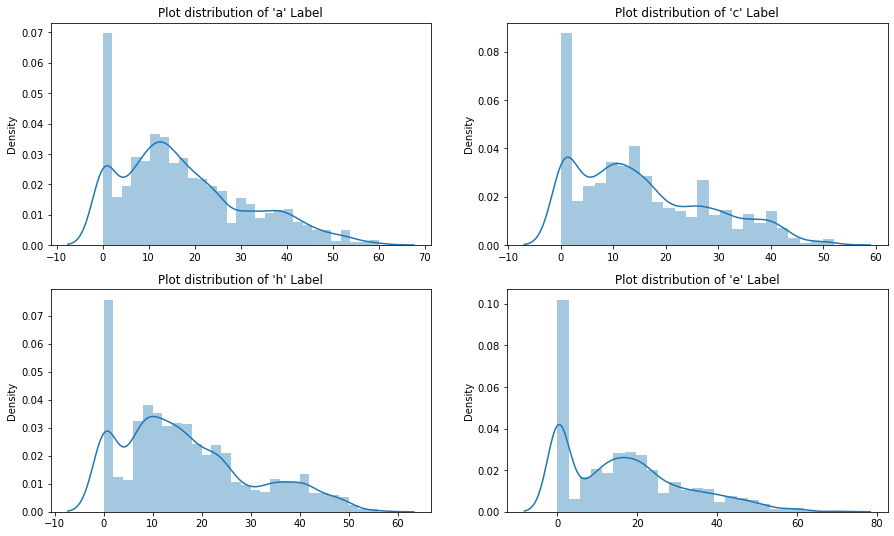

In [26]:
plot_distim(train_images, label=['a','h', 'c', 'e'])

In [27]:
def transform_features(data):
    features = []
    for image in data["Image"]:
        img = []
        for row in image:
            img.extend(row)
            
        features.append(img)
        
    transformed = pd.DataFrame(features)
        
    return transformed

In [28]:
transformed = transform_features(train_images) 
train_images = pd.concat([transformed, train_images], axis=1)
train_images = train_images.drop(columns=["Image"])

transformed_test = transform_features(test_images) 
test_images = pd.concat([transformed_test, test_images], axis=1)

In [29]:
train_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 49 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1000 non-null   float64
 1   1       1000 non-null   float64
 2   2       1000 non-null   float64
 3   3       1000 non-null   float64
 4   4       1000 non-null   float64
 5   5       1000 non-null   float64
 6   6       1000 non-null   float64
 7   7       1000 non-null   float64
 8   8       1000 non-null   float64
 9   9       1000 non-null   float64
 10  10      1000 non-null   float64
 11  11      1000 non-null   float64
 12  12      1000 non-null   float64
 13  13      1000 non-null   float64
 14  14      1000 non-null   float64
 15  15      1000 non-null   float64
 16  16      1000 non-null   float64
 17  17      1000 non-null   float64
 18  18      1000 non-null   float64
 19  19      1000 non-null   float64
 20  20      1000 non-null   float64
 21  21      1000 non-null   float64
 22  2

In [30]:
test_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 50 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       5000 non-null   float64
 1   1       5000 non-null   float64
 2   2       5000 non-null   float64
 3   3       5000 non-null   float64
 4   4       5000 non-null   float64
 5   5       5000 non-null   float64
 6   6       5000 non-null   float64
 7   7       5000 non-null   float64
 8   8       5000 non-null   float64
 9   9       5000 non-null   float64
 10  10      5000 non-null   float64
 11  11      5000 non-null   float64
 12  12      5000 non-null   float64
 13  13      5000 non-null   float64
 14  14      5000 non-null   float64
 15  15      5000 non-null   float64
 16  16      5000 non-null   float64
 17  17      5000 non-null   float64
 18  18      5000 non-null   float64
 19  19      5000 non-null   float64
 20  20      5000 non-null   float64
 21  21      5000 non-null   float64
 22  

In [31]:
#train_images.to_csv("clean_data\\Train_data.csv", index=False)
#test_images.to_csv("clean_data\\Test_data.csv", index=False)